# Visualizing Earnings Based On College Majors #

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are the some of the columns in the dataset:

- `Rank` - Rank by median earnings
- `Major_code` - Major code
- `Major` - Major description
- `Major_category` - Category of major
- `Total` - Total number of people with major
- `Sample_size` - Sample size (unweighted) of full-time
- `Men` - Male graduates
- `Women` - Female graduates
- `ShareWomen` - Women as share of total
- `Employed` - Number employed
- `Median` - Median salary of full-time, year-round workers
- `Low_wage_jobs` - Number in low-wage service jobs
- `Full_time` - Number employed 35 hours or more
- `Part_time` - Number employed less than 35 hours


We will explore the following questions from the dataset using visualization:

- Do students in more popular majors make more money?
- How many majors are predominanty male? Predominantly female?
- Which category of majors have the most students?

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
recent_grad = pd.read_csv('recent-grads.csv')

## Exploring Dataset ##

In [3]:
recent_grad.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grad.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grad.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grad.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [7]:
#use len() to find total number of rows 
raw_data_count = len(recent_grad)
raw_data_count

173

In [8]:
#Remove missing data
recent_grads = recent_grad.dropna()
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

### Byproduct of %matplotlib inline ###
Use `dataframe.plot()` to use `kind` parameter to specify the plot we want. Use `x` and `y` parameter to specify the data we want on each axis. 
- `%matplotlib inline` allows us to write one line code to generate (ex. scatterplot)

## Scatterplots ##
### Use the plots to explore the following questions: ###
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

Text(0.5, 1.0, 'Sample size vs. Median')

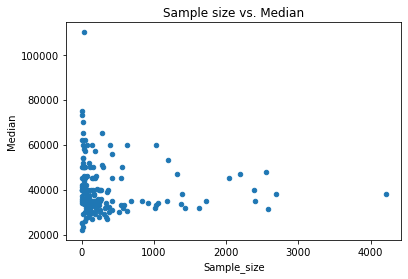

In [9]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample size vs. Median')

Text(0.5, 1.0, 'Sample size vs. Unemployment rate')

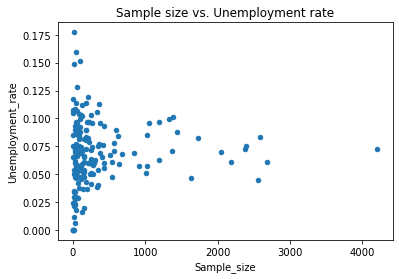

In [10]:
ax1 = recent_grads.plot(x='Sample_size', y = 'Unemployment_rate', kind='scatter')
ax1.set_title('Sample size vs. Unemployment rate')

Text(0.5, 1.0, 'Full time vs. Median')

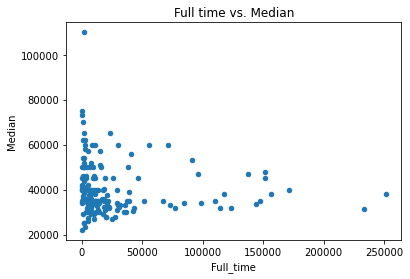

In [11]:
ax2 = recent_grads.plot(x='Full_time', y = 'Median', kind = 'scatter')
ax2.set_title('Full time vs. Median')

Text(0.5, 1.0, 'Share women vs. Unemployment rate')

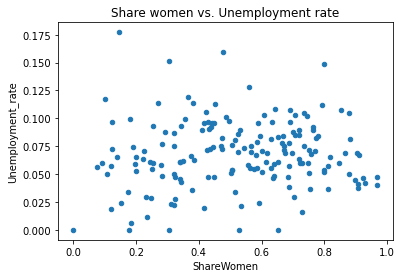

In [12]:
ax3 = recent_grads.plot(x='ShareWomen', y = 'Unemployment_rate', kind='scatter')
ax3.set_title('Share women vs. Unemployment rate')

Text(0.5, 1.0, 'Men vs. Median')

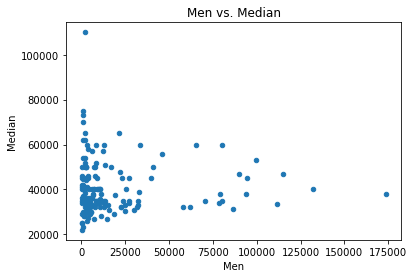

In [13]:
ax4 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax4.set_title('Men vs. Median')

Text(0.5, 1.0, 'Women vs. Median')

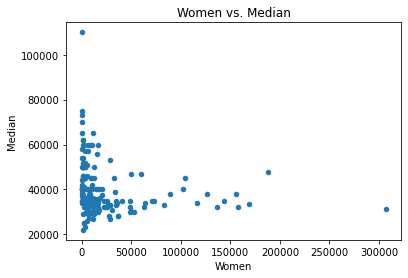

In [14]:
ax5 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax5.set_title('Women vs. Median')

### Conclusion
Looking at the data above we can see that there is no link between the number of full time employees and median salary, as well as the other comparison we've made. Moving on we are going to evaluate the column values in a deeper way.

## Pandas, Histograms ##
`dataframe.plot()` vs. `series.plot()`
- `dataframe.plot()` generates plots that use values from multiple columns (ex. scatter plot uses 2 sets of values (one for each axis) 
- `series.plot()` plots a specific column (ex. histogram only uses 1 set of value) 

<AxesSubplot:>

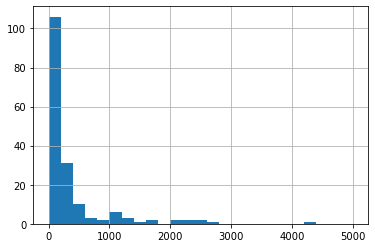

In [15]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

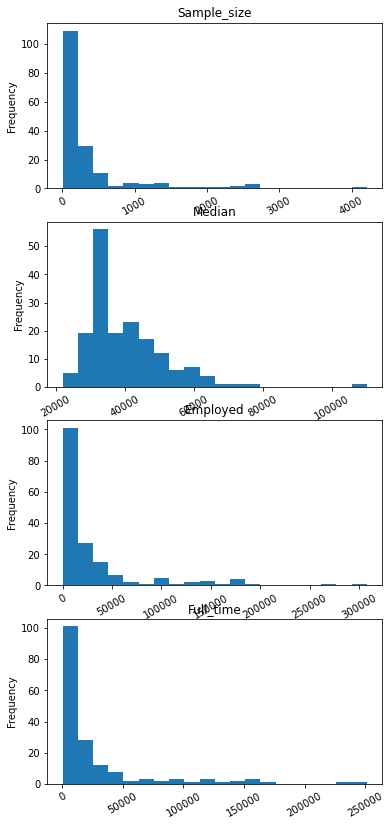

In [25]:
import matplotlib.pyplot as plt
cols = ['Sample_size','Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
fig = plt.figure(figsize=(6,14))
for c in range(0,4):
    ax = fig.add_subplot(4,1,c+1)
    ax = recent_grads[cols[c]].plot(kind='hist', bins=20, rot=30)
    ax = ax.set_title(cols[c])
    
    

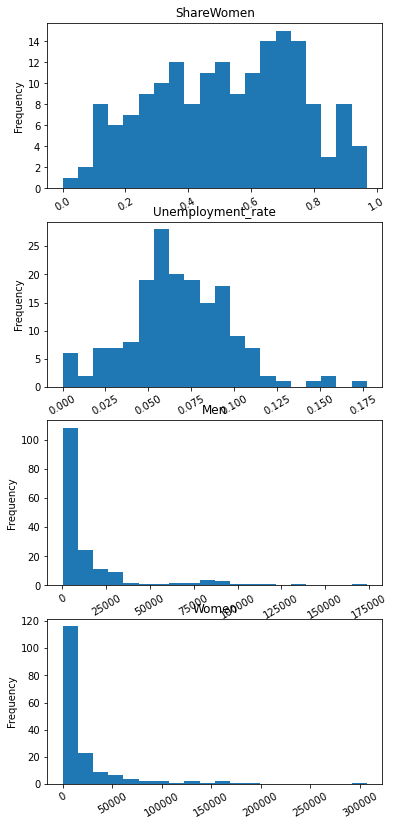

In [26]:
fig = plt.figure(figsize = (6,14))
for c in range(4,8):
    ax = fig.add_subplot(4,1,c-3)
    ax = recent_grads[cols[c]].plot(kind='hist', bins=20, rot = 30)
    ax = ax.set_title(cols[c])
    

## Pandas, Scatter Matrix Plot ##
**scatter matrix plot** combines both scatter plots and histrogram into one grid. 
- `scatter_matrix()` and select the columns 

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

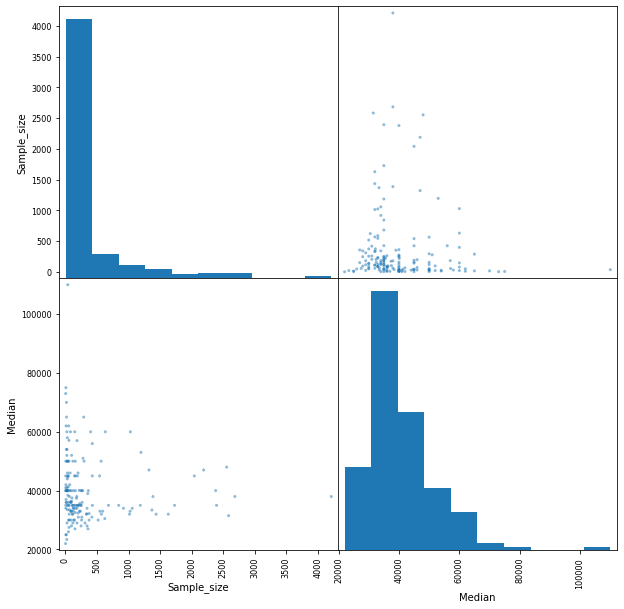

In [19]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

More popular course does not guarantee more money. The most popular course has a median of around 40,000 USD, which falls into the most common bin of medians in the dataset. 

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

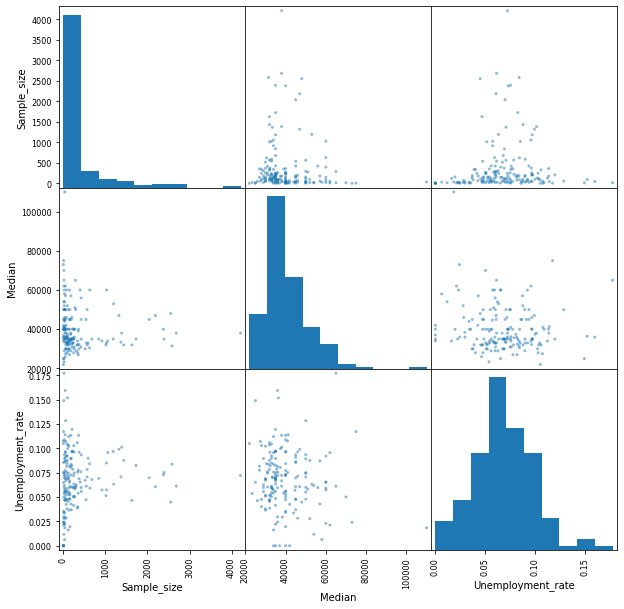

In [21]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Pandas, Bar Plots ##
`dataframe.plot.bar(x, y)` to specify `x` and `y` labels in the parameter

<AxesSubplot:xlabel='Major'>

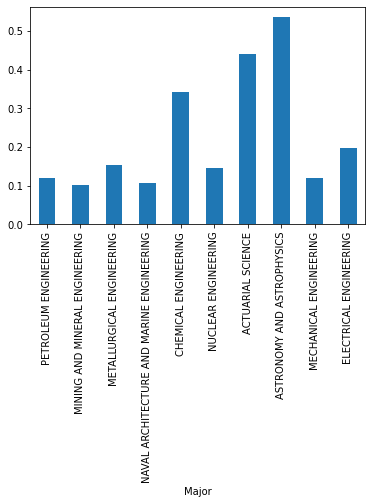

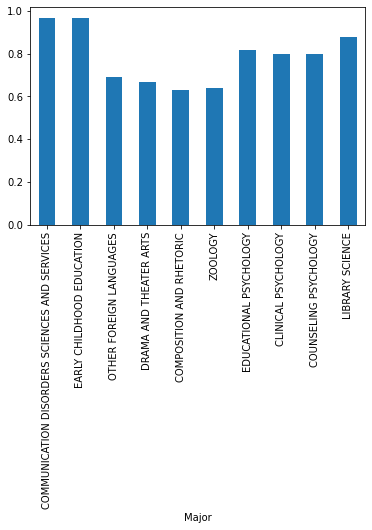

In [37]:
#Comparing Majors and Women enrolled in those majors 
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen',legend=False)

Among women, **communication disorders sciences and services** and **early childhood education** are the two most popular majors.
**mining and mineral engineering** and **naval architecture and marine engineering** are the two of the least popular majors. 

<AxesSubplot:xlabel='Major'>

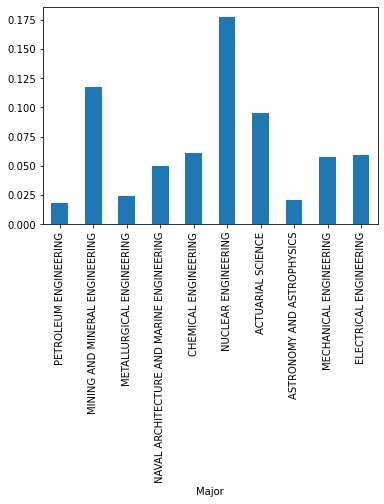

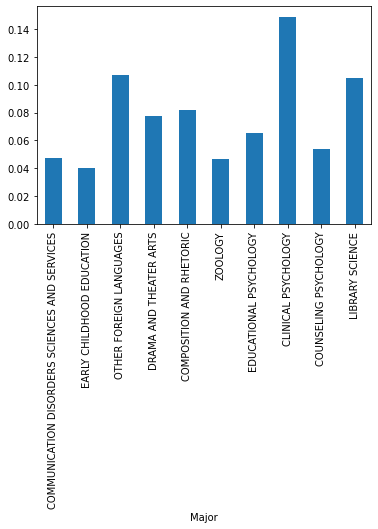

In [40]:
#Comparing unemployment rate and recent grads 
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

**Nuclear Engineering** and **Clinical Psychology** are the two majors with the highest unemployment rate. 
**Petroleum Enginnering** and **Astronomy and Astrophysics** have the lowest unemployment rate. 

## Grouped Bar Plot ##
Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

<AxesSubplot:xlabel='Major_category'>

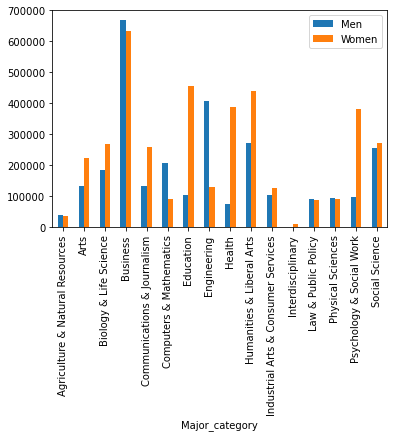

In [55]:
recent_grads_grouped = recent_grads.groupby('Major_category').sum()
recent_grads_grouped[['Men', 'Women']].plot.bar()

Business is the most popular among both men and women. However, there are few majors that have big differences. Psychology & Social Work, Education and Health are majority women. On the other hand, Engineering and Computers & Mathematics have majority men. 

## Explore Box Plot Distribution of Median Salaries and Unemployment Rate ## 
Use a box plot to explore the distributions of median salaries and unemployment rate.

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

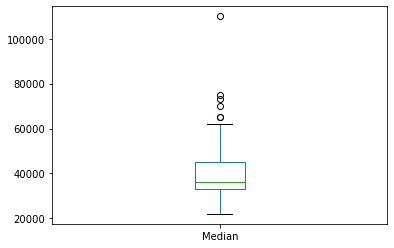

In [57]:
recent_grads['Median'].plot(kind='box')
recent_grads['Median'].describe()

Based on the boxplot, 50% of the median salaries are 36,000. The majority range from 33,000 to 45,000. And there are 5 outliers that exceed above the 60,000 range. 

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

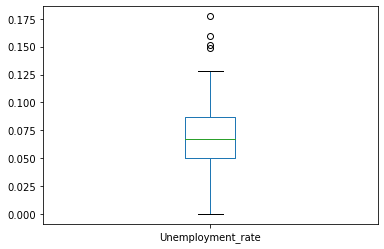

In [58]:
recent_grads['Unemployment_rate'].plot(kind='box')
recent_grads['Unemployment_rate'].describe()

## Visualizing Columns using Hexagonal Bin ##
Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

<AxesSubplot:xlabel='Men', ylabel='Median'>

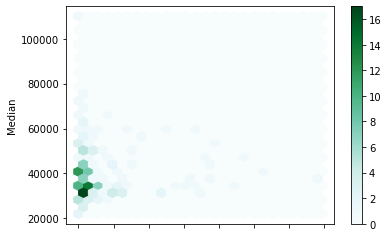

In [60]:
recent_grads.plot.hexbin(x='Men', y='Median', gridsize = 25)

The hexbin plot allows use to see which area is densely filled. We can see that the majority of men earn from 30K to 45K. 